In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


![link text](https://seaborn.pydata.org/_static/logo-wide-lightbg.svg)

# Seaborn tutorial

This notebook introduces us to the basics of statistical data visualization. I have used the Seaborn library for the data visualization purpose.


Following references are used in this kernel.



Data visualization helps us to discover hidden insights from our data.


So, let's get started.



### Table of Contents


The table of contents for this tutorial is as follows -

-	Import libraries
-	Read dataset
-	Exploratory data analysis
-	Visualize distribution of Age variable with Seaborn distplot() function
-	Seaborn Kernel Density Estimation (KDE) plot
-	Histograms
-	Visualize distribution of values in Preferred Foot variable with Seaborn countplot() function
-	Seaborn catplot() function
-	Seaborn stripplot() function
-	Seaborn boxplot() function
-	Seaborn violinplot() function
-	Seaborn pointplot() function
-	Seaborn barplot() function
-	Visualizing statistical relationship with Seaborn relplot() function
-	Seaborn scatterplot() function
-	Seaborn lineplot() function
-	Seaborn regplot() function
-	Seaborn lmplot() function
-	Multi-plot grids
-	Seaborn Facetgrid() function
-	Seaborn Pairgrid() function
-	Seaborn Jointgrid() function
-	Controlling the size and shape of the plot
-	Seaborn figure styles

We can broadly divide them into three types/categories for better understanding at initial stage


1. These shows all the observations

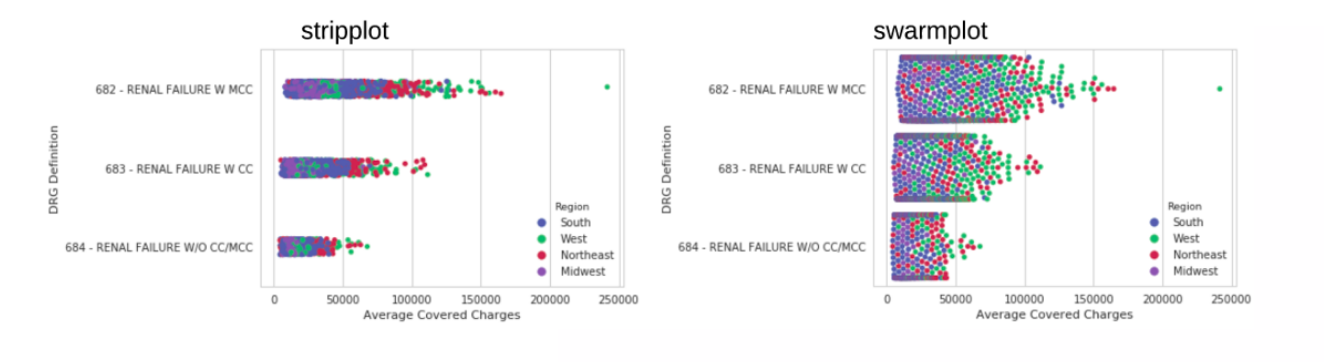

2. They are for the abstract representations.

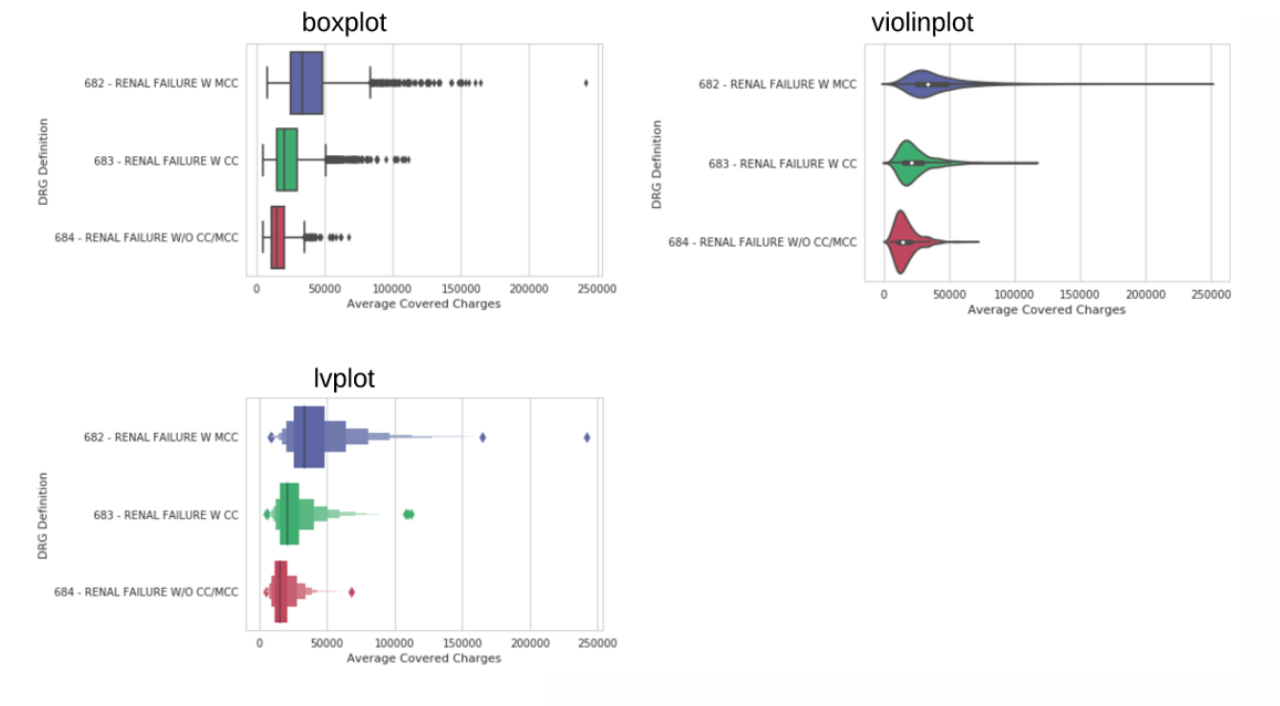

3. These are for Statistical estimates.

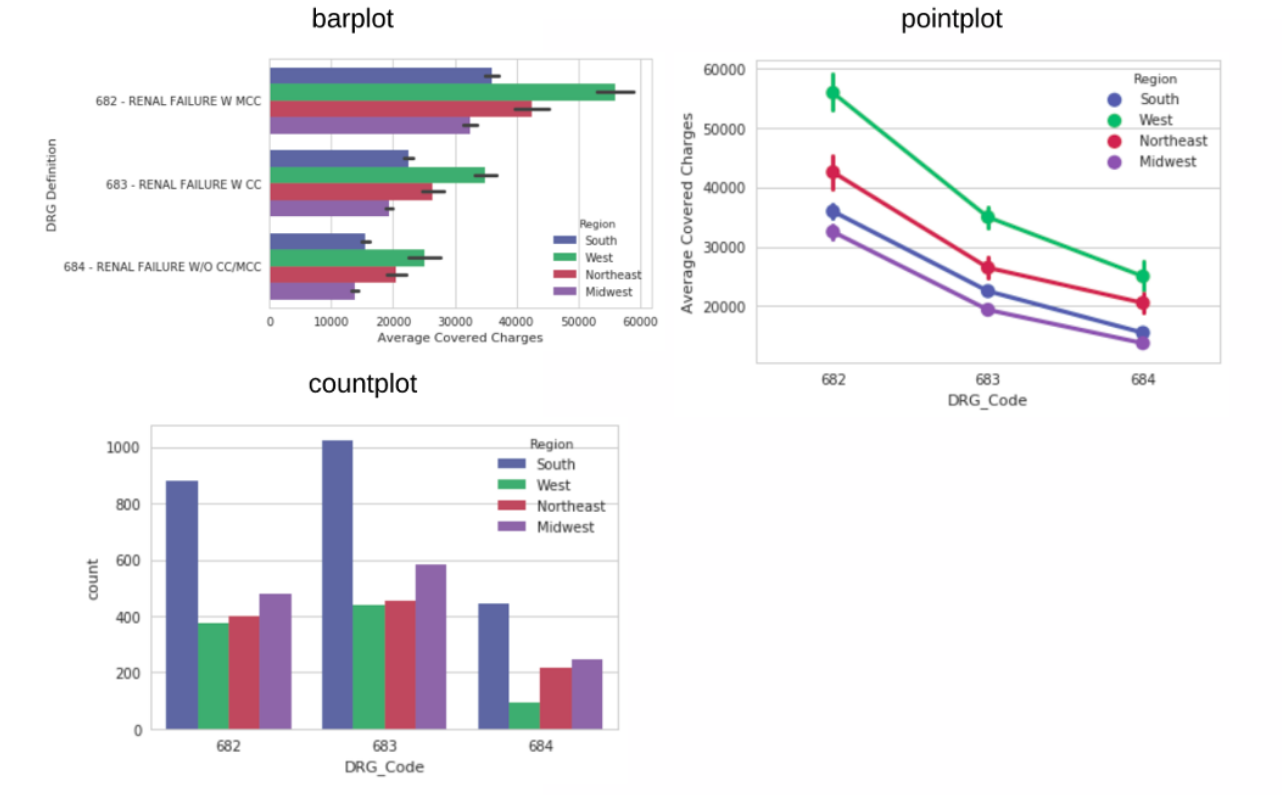

### Import libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline


In [ ]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')


### Read dataset

In this kernel, I will focus on those datasets which help to explain various features of Seaborn.  So, I will read the related datasets with pandas read_csv() function.

In [ ]:
fifa19 = pd.read_csv('/content/drive/MyDrive/masterclass/data.csv', index_col=0)


### Exploratory Data Analysis

### Preview the dataset

In [ ]:
fifa19.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,...,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


### View summary of dataset

In [ ]:
fifa19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 0 to 18206
Data columns (total 88 columns):
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null float64
Work Rate                   18159 non-null 

In [ ]:
fifa19['Body Type'].value_counts()

Normal                 10595
Lean                    6417
Stocky                  1140
Akinfenwa                  1
Courtois                   1
Messi                      1
PLAYER_BODY_TYPE_25        1
Shaqiri                    1
C. Ronaldo                 1
Neymar                     1
Name: Body Type, dtype: int64

In [ ]:
#It is a function that shows the analysis of numerical values.
fifa19.describe()

,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,49.734181,45.550911,52.298144,58.686712,42.909026,55.371001,47.170824,42.863153,52.711933,58.369459,64.614076,64.726967,63.503607,61.836610,63.966573,55.460047,65.089432,63.219946,65.311967,47.109973,55.868991,46.698276,49.958478,53.400903,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,18.364524,19.525820,17.379909,14.699495,17.694408,18.910371,18.395264,17.478763,15.327870,16.686595,14.927780,14.649953,14.766049,9.010464,14.136166,17.237958,11.820044,15.894741,12.557000,19.260524,17.367967,20.696909,19.529036,14.146881,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,57.000000,57.000000,55.000000,56.000000,56.000000,45.000000,58.000000,56.000000,58.000000,33.000000,44.000000,26.000000,38.000000,44.000000,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,67.000000,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,57.000000,64.000000,69.000000,75.000000,75.000000,74.000000,68.000000,74.000000,68.000000,73.000000,74.000000,74.000000,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.000000,94.000000,93.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,95.000000,95.000000,96.000000,97.000000,94.000000,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.

In [ ]:
#It is a function that shows the analysis of proximity values between data.
fifa19.corr()

,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
ID,1.000000,-0.739208,-0.417025,0.047074,-0.231352,-0.356191,-0.075784,-0.056914,0.182074,-0.131994,-0.082323,-0.106815,-0.136279,-0.159915,-0.030340,-0.169511,-0.199549,-0.186764,-0.100184,0.133236,0.132437,-0.019897,-0.408617,0.048463,-0.166133,-0.169369,-0.053895,-0.259756,-0.161549,-0.228329,-0.160602,-0.088330,-0.215170,-0.140657,-0.384473,-0.110198,-0.085929,-0.068409,-0.105594,-0.111149,-0.106652,-0.118250,-0.105778
Age,-0.739208,1.000000,0.452350,-0.253312,0.236695,0.253765,0.059867,0.027649,-0.241156,0.130545,0.068660,0.147183,0.132894,0.142472,0.010166,0.143276,0.193467,0.181310,0.084969,-0.158667,-0.151682,-0.019395,0.453124,-0.089877,0.156947,0.177167,0.097793,0.332798,0.155096,0.265190,0.197845,0.082443,0.187422,0.139535,0.391023,0.142817,0.119745,0.103089,0.101277,0.106419,0.104964,0.116402,0.103313
Overall,-0.417025,0.452350,1.000000,0.660939,0.606960,0.499491,0.212015,0.414463,-0.218931,0.394972,0.332515,0.340776,0.502550,0.391338,0.372426,0.419491,0.396892,0.483909,0.460197,0.196869,0.210647,0.264952,0.850045,0.103160,0.441118,0.264435,0.365656,0.349326,0.420795,0.395470,0.321326,0.356493,0.498894,0.341429,0.727655,0.286505,0.252629,0.222811,-0.025937,-0.025062,-0.029372,-0.017674,-0.023276
Potential,0.047074,-0.253312,0.660939,1.000000,0.383727,0.372993,0.162346,0.354290,-0.010474,0.246319,0.243355,0.200988,0.369189,0.254906,0.315019,0.279944,0.230544,0.321437,0.354396,0.234608,0.236771,0.222310,0.513425,0.138025,0.288318,0.109151,0.202563,0.075769,0.266740,0.171174,0.154908,0.245616,0.348141,0.224281,0.440008,0.162801,0.143564,0.128980,-0.053446,-0.054672,-0.059061,-0.052589,-0.053341
Special,-0.231352,0.236695,0.606960,0.383727,1.000000,0.292208,0.341855,0.763412,-0.133716,0.866417,0.724244,0.644421,0.906729,0.773974,0.874274,0.851900,0.806414,0.846302,0.912107,0.654337,0.645963,0.699673,0.597169,0.586788,0.835277,0.321846,0.792762,0.192990,0.840049,0.666236,0.561676,0.824307,0.761992,0.734533,0.752331,0.561866,0.538802,0.506968,-0.674637,-0.673625,-0.670254,-0.668272,-0.673238
International Reputation,-0.356191,0.253765,0.499491,0.372993,0.292208,1.000000,0.128317,0.208153,-0.077298,0.191770,0.178373,0.157483,0.242803,0.243089,0.179041,0.233681,0.223564,0.239525,0.217946,0.044319,0.044070,0.100869,0.445614,0.050076,0.227772,0.120931,0.094780,0.131280,0.213960,0.173327,0.129586,0.183003,0.284600,0.218620,0.392787,0.115208,0.092846,0.079176,0.004526,0.003942,0.000651,0.006904,0.003444
Weak Foot,-0.075784,0.059867,0.212015,0.162346,0.341855,0.128317,1.000000,0.340721,-0.035410,0.307925,0.357416,0.183238,0.322133,0.357340,0.352658,0.345468,0.330472,0.277174,0.356383,0.261435,0.248822,0.302062,0.201341,0.254022,0.332855,0.069752,0.232094,-0.008470,0.355967,0.131524,0.053097,0.346896,0.337897,0.330252,0.278132,0.065673,0.042646,0.026105,-0.231905,-0.233098,-0.229395,-0.231298,-0.232574
Skill Moves,-0.056914,0.027649,0.414463,0.354290,0.763412,0.208153,0.340721,1.000000,-0.035194,0.741035,0.743439,0.443005,0.730363,0.745077,0.839757,0.771052,0.701068,0.622342,0.818051,0.652356,0.624098,0.681765,0.377044,0.578459,0.718237,0.107553,0.570226,-0.041475,0.752980,0.347795,0.209604,0.781248,0.674057,0.690434,0.586836,0.241428,0.210517,0.178607,-0.621675,-0.619755,-0.616990,-0.618853,-0.621925
Jersey Number,0.182074,-0.241156,-0.218931,-0.010474,-0.133716,-0.077298,-0.035410,-0.035194,1.000000,-0.076585,-0.006639,-0.091688,-0.100241,-0.026731,-0.028021,-0.055428,-0.068843,-0.117424,-0.073210,-0.004395,-0.015069,-0.034158,-0.192622,0.008009,-0.053860,-0.104179,-0.127822,-0.158

In [ ]:
#check if there are null values
fifa19.isnull().values.any()

True

In [ ]:
#checking count of null values for each column
fifa19.isnull().sum()

ID                   0
Name                 0
Age                  0
Photo                0
Nationality          0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 88, dtype: int64

#### Comment


- This dataset contains 88 columns.

- Out of the 88 variables, 45 are numerical variables. 38 are of float64 data type and remaining 5 are of int64 data type.

- Let's explore this further.



### Explore `Age` variable

### Visualize distribution of `Age` variable with **Seaborn `distplot()` function**



- Seaborn's **`distplot()`** function flexibly plots a univariate distribution of observations.

- This function combines the matplotlib hist function (with automatic calculation of a good default bin size) with the seaborn **`kdeplot()`** and **`rugplot()`** functions.

* - So, let's visualize the distribution of `Age` variable with Seaborn `distplot()` function.

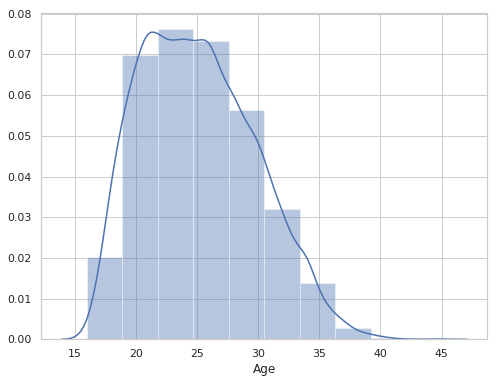

In [ ]:
f, ax = plt.subplots(figsize=(8,6))
x = fifa19['Age']
ax = sns.distplot(x, bins=10)
plt.show()

### Comment

- It can be seen that the `Age` variable is slightly positively skewed.





We can use Pandas series object to get an informative axis label as follows-

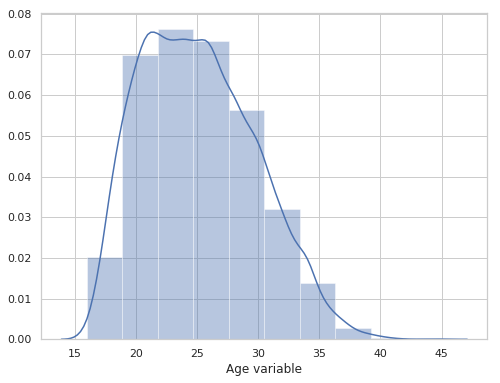

In [ ]:
f, ax = plt.subplots(figsize=(8,6))
x = fifa19['Age']
x = pd.Series(x, name="Age variable")
ax = sns.distplot(x, bins=10)
plt.show()

We can plot the distribution on the vertical axis as follows:-

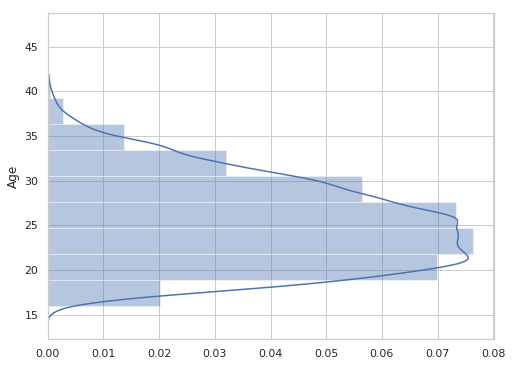

In [ ]:
f, ax = plt.subplots(figsize=(8,6))
x = fifa19['Age']
ax = sns.distplot(x, bins=10, vertical = True)
plt.show()

### **Seaborn Kernel Density Estimation `(KDE)` Plot**




- The **`kernel density estimate (KDE)`** plot is a useful tool for plotting the shape of a distribution. 

- Seaborn kdeplot is another seaborn plotting function that fits and plot a univariate or bivariate kernel density estimate.

- Like the histogram, the KDE plots encode the density of observations on one axis with height along the other axis.

- We can plot a KDE plot as follows-

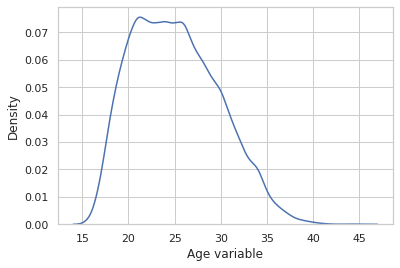

In [ ]:
# f, ax = plt.subplots(figsize=(8,6)) # to customze the shape of a grid
x = fifa19['Age']
x = pd.Series(x, name="Age variable")
ax = sns.kdeplot(x)
plt.show()

We can shade under the density curve and use a different color as follows:-

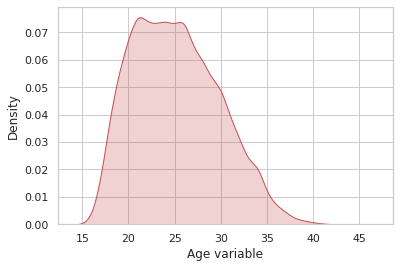

In [ ]:
# f, ax = plt.subplots(figsize=(8,6))# to customize the shape of a grid
x = fifa19['Age']
x = pd.Series(x, name="Age variable")
ax = sns.kdeplot(x, shade=True, color='r')
plt.show()

### **Histograms**

- A histogram represents the distribution of data by forming bins along the range of the data and then drawing bars to show the number of observations that fall in each bin. 

- A `hist()` function already exists in matplotlib. 

- We can use Seaborn to plot a histogram.


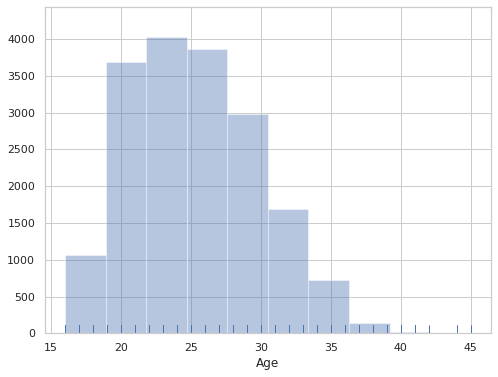

In [ ]:
f, ax = plt.subplots(figsize=(8,6))
x = fifa19['Age']
ax = sns.distplot(x, kde=False, rug=True, bins=10)
plt.show()

We can plot a KDE plot alternatively as follows:-

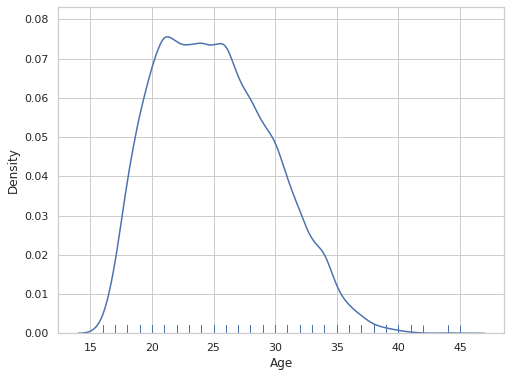

In [ ]:
f, ax = plt.subplots(figsize=(8,6))
x = fifa19['Age']
ax = sns.distplot(x, hist=False, rug=True, bins=10)
plt.show()

### **Explore** `Preferred Foot` **variable**

### Check number of unique values in **`Preferred Foot`** variable

In [ ]:
fifa19['Preferred Foot'].nunique()

2

We can see that there are two types of unique values in `Preferred Foot` variable.

### Check frequency distribution of values in `Preferred Foot` variable

In [ ]:
fifa19['Preferred Foot'].value_counts()

Right    13948
Left      4211
Name: Preferred Foot, dtype: int64

The `Preferred Foot` variable contains two types of values - `Right` and `Left`.

### Visualize distribution of values with **Seaborn's `countplot()` function**.



- A countplot shows the counts of observations in each categorical bin using bars.

- It can be thought of as a histogram across a categorical, instead of quantitative, variable.

- This function always treats one of the variables as categorical and draws data at ordinal positions (0, 1, … n) on the relevant axis, even when the data has a numeric or date type.

1. - We can visualize the distribution of values with Seaborn `countplot()` function as follows-

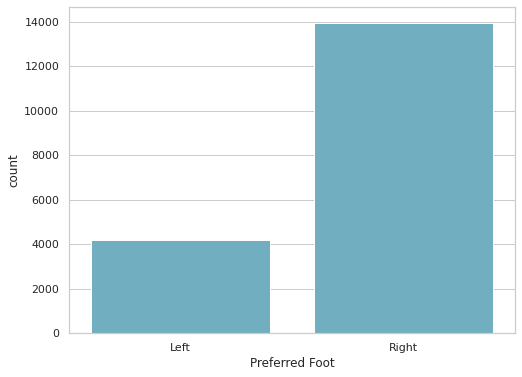

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
sns.countplot(x="Preferred Foot", data=fifa19, color="c")
plt.show()

We can show value counts for two categorical variables as follows-

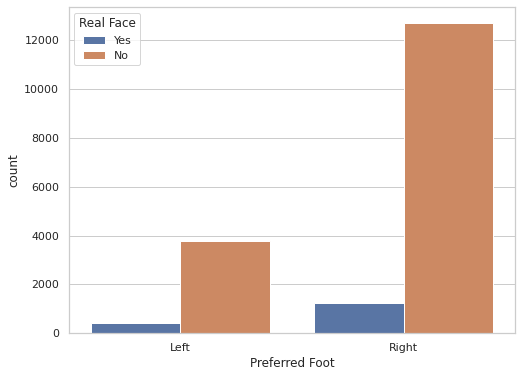

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
sns.countplot(x="Preferred Foot", hue="Real Face", data=fifa19)
plt.show()

We can draw plot vertically as follows-

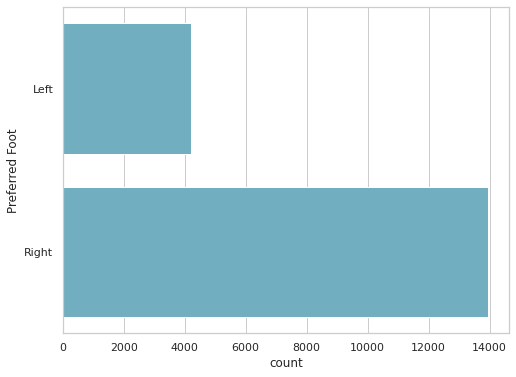

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
sns.countplot(y="Preferred Foot", data=fifa19, color="c")
plt.show()

### **Seaborn's `Catplot()` function**

- We can use Seaborn `Catplot()` function to plot categorical scatterplots.

- The default representation of the data in `catplot()` uses a scatterplot. 

- It helps to draw figure-level interface for drawing categorical plots onto a facetGrid.

- This function provides access to several axes-level functions that show the relationship between a numerical and one or more categorical variables using one of several visual representations. 

- The `kind` parameter selects the underlying axes-level function to use.

We can use the kind parameter to draw different plot kin to visualize the same data. We can use the Seaborn `catplot()` function to draw a `countplot()` as follows-

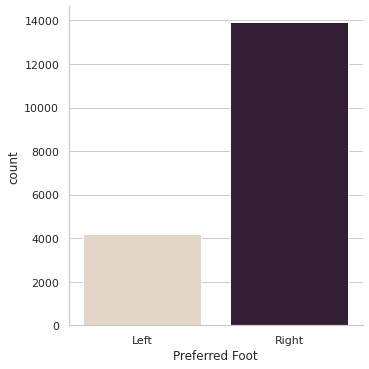

In [ ]:
g = sns.catplot(x="Preferred Foot", kind= "count", palette="ch:.25", data=fifa19)
# Options are: “strip”, “swarm”, “box”, “violin”, “boxen”, “point”, “bar”, or “count” , but they work on some conditions preffered to refer documentation before using

### Explore `International Reputation` variable

### Check the number of unique values in `International Reputation` variable

In [ ]:
fifa19['International Reputation'].nunique()

5

### Check the distribution of values in `International Reputation` variable

In [ ]:
fifa19['International Reputation'].value_counts()

1.0    16532
2.0     1261
3.0      309
4.0       51
5.0        6
Name: International Reputation, dtype: int64

### **Seaborn's `Stripplot()` function**




- This function draws a scatterplot where one variable is categorical.

- A strip plot can be drawn on its own, but it is also a good complement to a box or violin plot in cases where we want to show all observations along with some representation of the underlying distribution.

- I will plot a stripplot with `International Reputation` as categorical variable and `Potential` as the other variable.

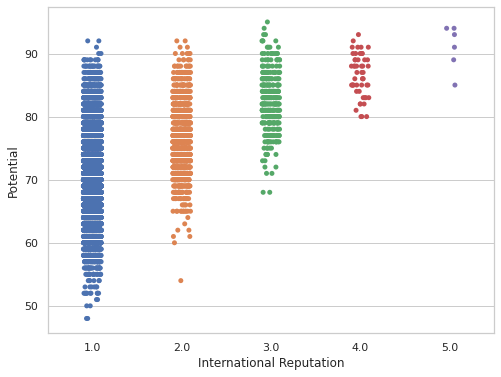

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(x="International Reputation", y="Potential", data=fifa19)
plt.show()

-> We can add jitter to bring out the distribution of values as follows-

**jitter** : `float, True/1 is special-cased, optional`

Amount of jitter (only along the categorical axis) to apply. This can be useful when you have many points and they overlap, so that it is easier to see the distribution. You can specify the amount of jitter (half the width of the uniform random variable support), or just use True for a good default.

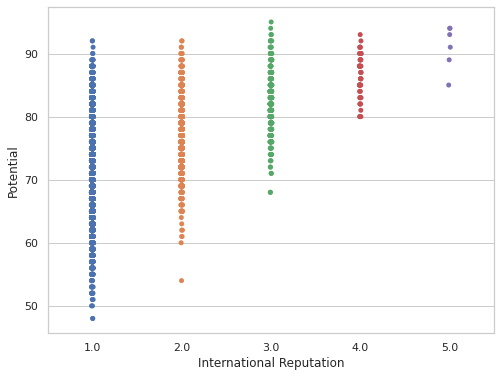

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(x="International Reputation", y="Potential", data=fifa19, jitter=0.01)
plt.show()

We can nest the strips within a second categorical variable - `Preferred Foot` as folows-

**palette**: `palette name, list, or dict`

Colors to use for the different levels of the hue variable. Should be something that can be interpreted by[color_palette()](https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette)

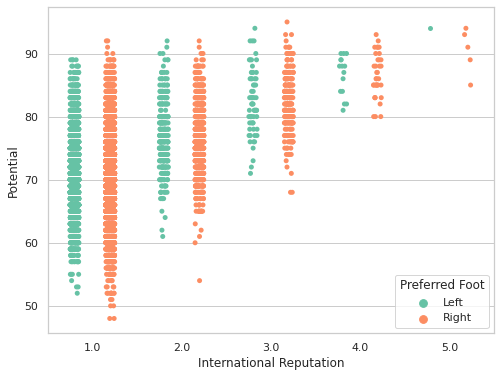

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(x="International Reputation", y="Potential", hue="Preferred Foot", 
                   data=fifa19, jitter=0.2, palette="Set2", dodge=True)
plt.show()

We can draw strips with large points and different aesthetics as follows-

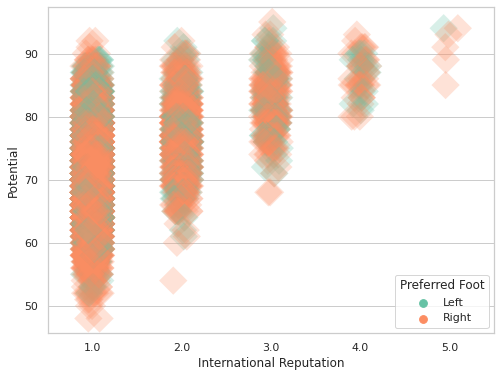

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(x="International Reputation", y="Potential", hue="Preferred Foot", 
                   data=fifa19, palette="Set2", size=20, marker="D",
                   edgecolor="gray", alpha=.25)
plt.show()

### **Seaborn `boxplot()` function**




- This function draws a box plot to show distributions with respect to categories.

- A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. 

- The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

- I will plot the boxplot of the `Potential` variable as follows-

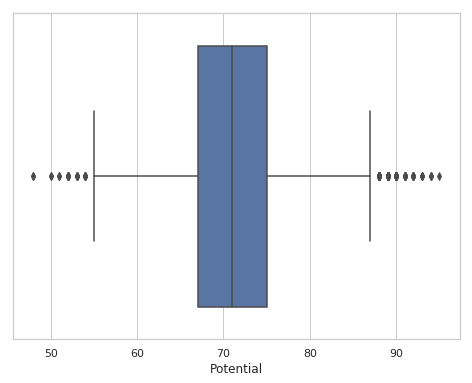

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=fifa19["Potential"])
plt.show()

We can draw the vertical boxplot grouped by the categorical variable `International Reputation` as follows-

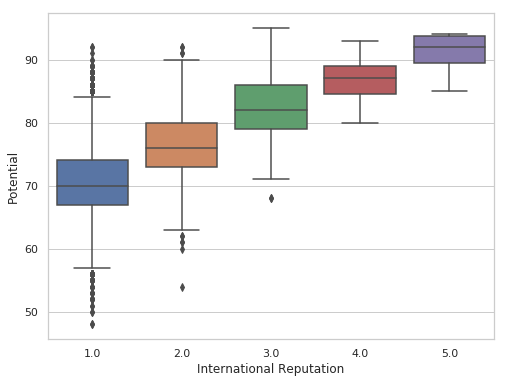

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x="International Reputation", y="Potential", data=fifa19)
plt.show()

We can draw a boxplot with nested grouping by two categorical variables as follows-

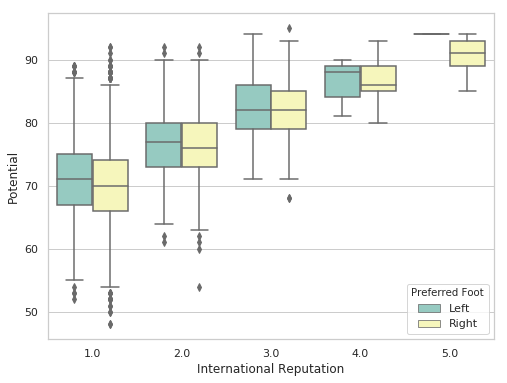

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x="International Reputation", y="Potential", hue="Preferred Foot", data=fifa19, palette="Set3")
plt.show()

### **Seaborn's `violinplot()` function**




- This function draws a combination of boxplot and kernel density estimate.

- A violin plot plays a similar role as a box and whisker plot. 

- It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. 

- Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.

- I will plot the violinplot of `Potential` variable as follows-

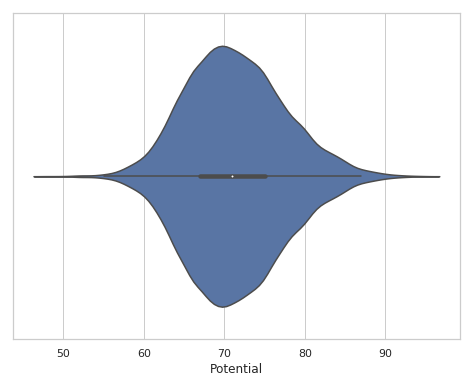

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
sns.violinplot(x=fifa19["Potential"])
plt.show()

We can draw the vertical violinplot grouped by the categorical variable `International Reputation` as follows-

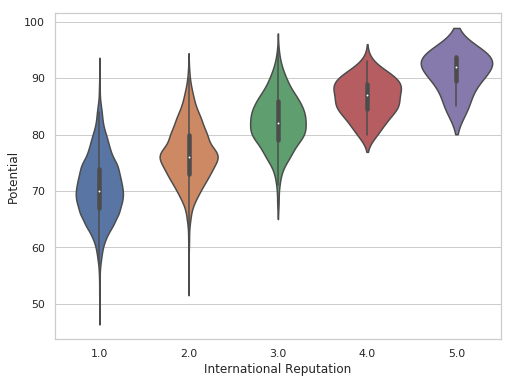

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
sns.violinplot(x="International Reputation", y="Potential", data=fifa19)
plt.show()

We can draw a violinplot with nested grouping by two categorical variables as follows-

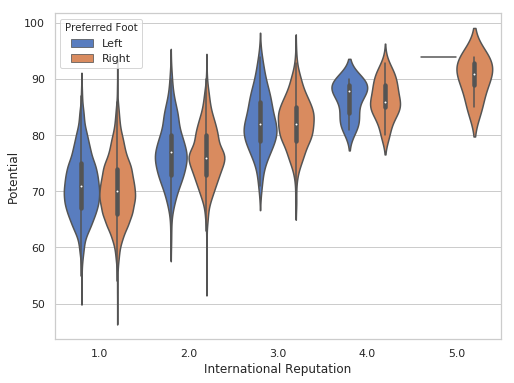

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
sns.violinplot(x="International Reputation", y="Potential", hue="Preferred Foot", data=fifa19, palette="muted")
plt.show()

We can draw split violins to compare the across the hue variable as follows-

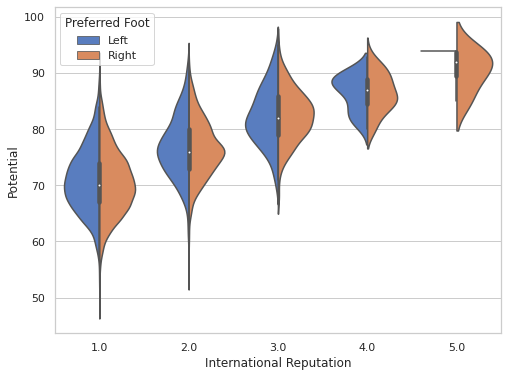

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
sns.violinplot(x="International Reputation", y="Potential", hue="Preferred Foot", 
               data=fifa19, palette="muted", split=True)
plt.show()

### **Seaborn `pointplot()` function**



- This function show point estimates and confidence intervals using scatter plot glyphs.

- A point plot represents an estimate of central tendency for a numeric variable by the position of scatter plot points and provides some indication of the uncertainty around that estimate using error bars.

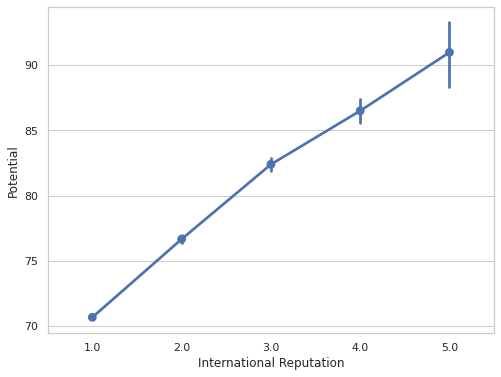

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
sns.pointplot(x="International Reputation", y="Potential", data=fifa19)
plt.show()

We can draw a set of vertical points with nested grouping by a two variables as follows-

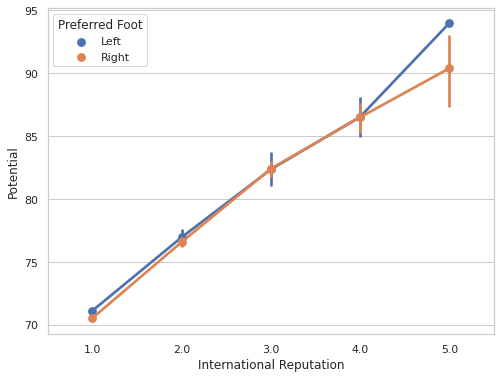

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
sns.pointplot(x="International Reputation", y="Potential", hue="Preferred Foot", data=fifa19)
plt.show()

We can separate the points for different hue levels along the categorical axis as follows-

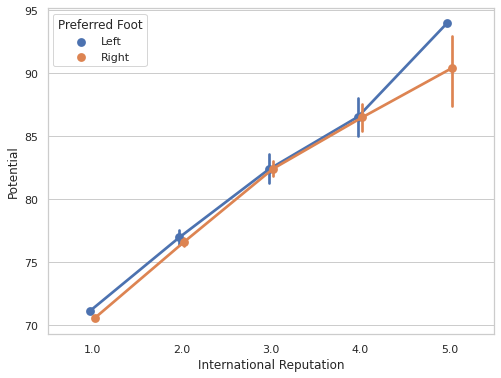

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
sns.pointplot(x="International Reputation", y="Potential", hue="Preferred Foot", data=fifa19, dodge=True)
plt.show()

We can use a different marker and line style for the hue levels as follows-

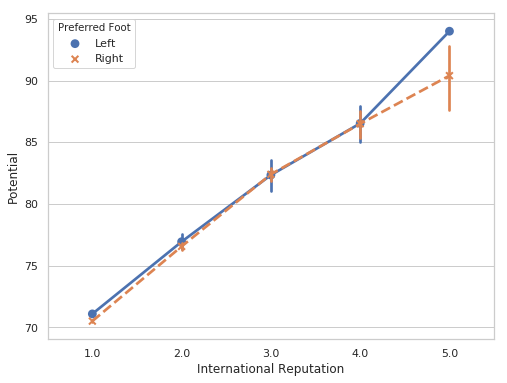

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
sns.pointplot(x="International Reputation", y="Potential", hue="Preferred Foot", 
              data=fifa19, markers=["o", "x"], linestyles=["-", "--"])
plt.show()

### **Seaborn `barplot()` function**


- This function show point estimates and confidence intervals as rectangular bars.

- A bar plot represents an estimate of central tendency for a numeric variable with the height of each rectangle and provides some indication of the uncertainty around that estimate using error bars. 

- Bar plots include 0 in the quantitative axis range, and they are a good choice when 0 is a meaningful value for the quantitative variable, and you want to make comparisons against it.

- We can plot a barplot as follows-

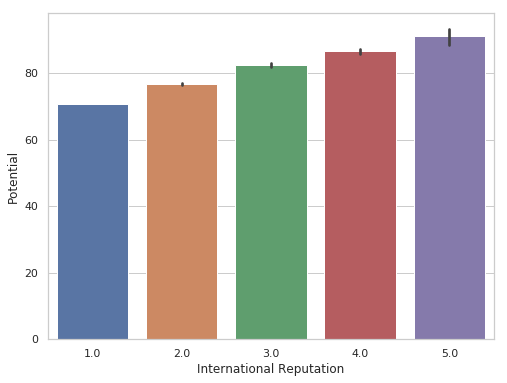

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x="International Reputation", y="Potential", data=fifa19)
plt.show()

We can draw a set of vertical bars with nested grouping by a two variables as follows-

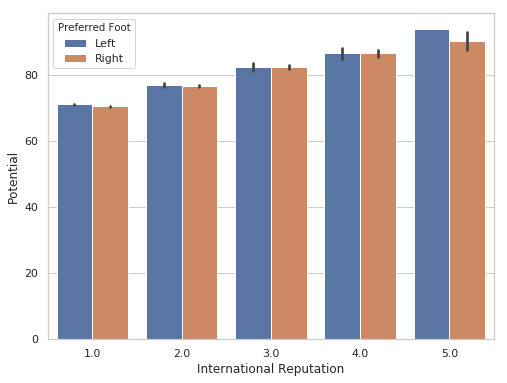

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x="International Reputation", y="Potential", hue="Preferred Foot", data=fifa19)
plt.show()

We can use median as the estimate of central tendency as follows-

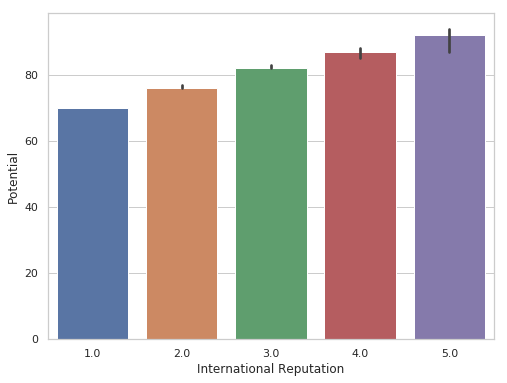

In [ ]:
from numpy import median
f, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x="International Reputation", y="Potential", data=fifa19, estimator=median)
plt.show()

We can show the standard error of the mean with the error bars as follows-

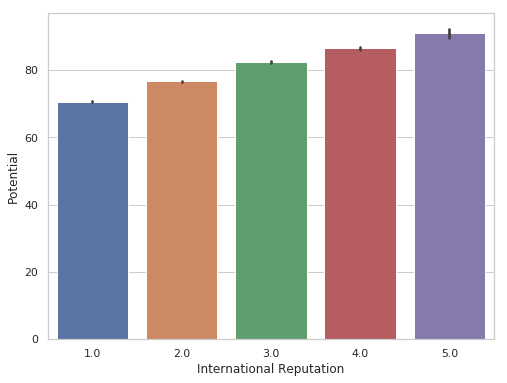

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x="International Reputation", y="Potential", data=fifa19, ci=68)
plt.show()

We can show standard deviation of observations instead of a confidence interval as follows-

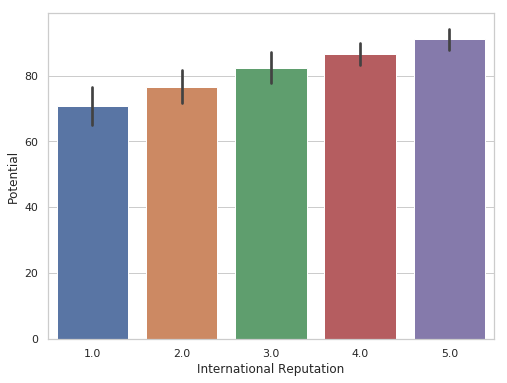

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x="International Reputation", y="Potential", data=fifa19, ci="sd")
plt.show()

We can add “caps” to the error bars as follows-

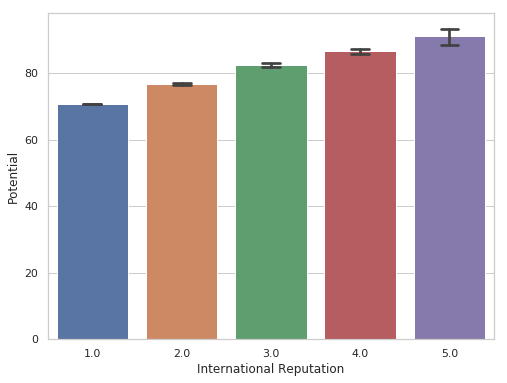

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x="International Reputation", y="Potential", data=fifa19, capsize=0.2)
plt.show()

### Visualizing statistical relationship with Seaborn `relplot()` function

### **Seaborn `relplot()` function**


- Seaborn `relplot()` function helps us to draw figure-level interface for drawing relational plots onto a FacetGrid.

- This function provides access to several different axes-level functions that show the relationship between two variables with semantic mappings of subsets. 

- The `kind` parameter selects the underlying axes-level function to use-

- scatterplot() (with kind="scatter"; the default)

- lineplot() (with kind="line")

We can plot a scatterplot with variables `Heigh` and `Weight` with Seaborn `relplot()` function as follows-

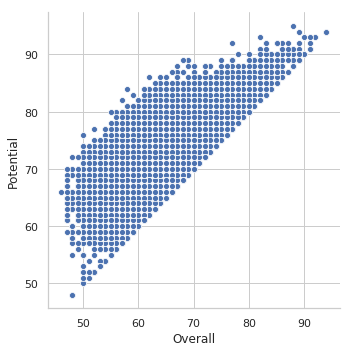

In [ ]:
g = sns.relplot(x="Overall", y="Potential", data=fifa19)

### **Seaborn `scatterplot()` function**




- This function draws a scatter plot with possibility of several semantic groups.

- The relationship between x and y can be shown for different subsets of the data using the `hue`, `size` and `style` parameters. 

- These parameters control what visual semantics are used to identify the different subsets.

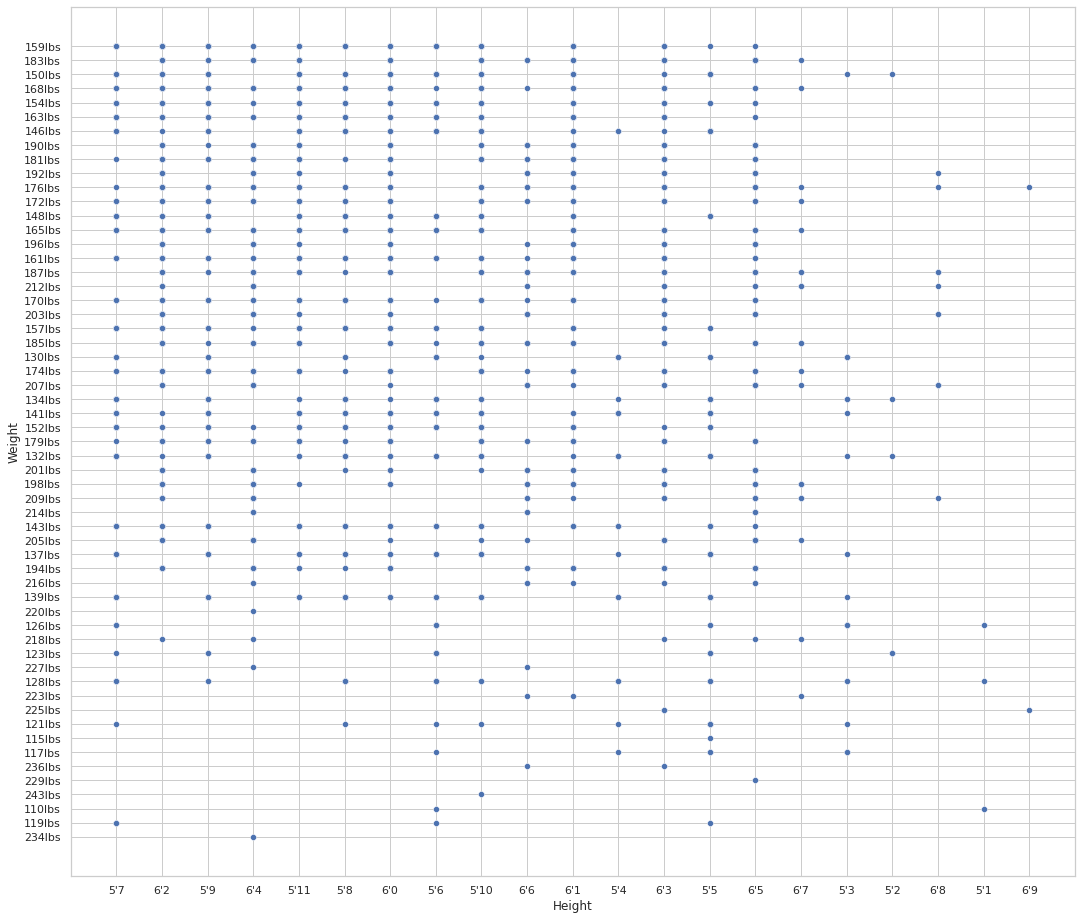

In [ ]:
f, ax = plt.subplots(figsize=(18, 16))
sns.scatterplot(x="Height", y="Weight", data=fifa19)
plt.show()

### **Seaborn `lineplot()` function**




- THis function draws a line plot with possibility of several semantic groupings.

- The relationship between x and y can be shown for different subsets of the data using the `hue`, `size` and `style` parameters. 

- These parameters control what visual semantics are used to identify the different subsets.

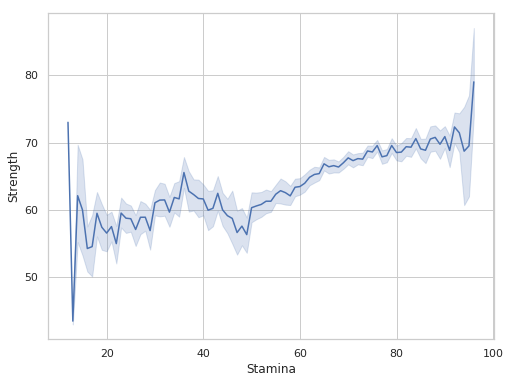

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.lineplot(x="Stamina", y="Strength", data=fifa19)
plt.show()

### Visualize linear relationship with Seaborn `regplot()` function

### **Seaborn `regplot()` function**



- This function plots data and a linear regression model fit.

- We can plot a linear regression model between `Overall` and `Potential` variable with `regplot()` function as follows-

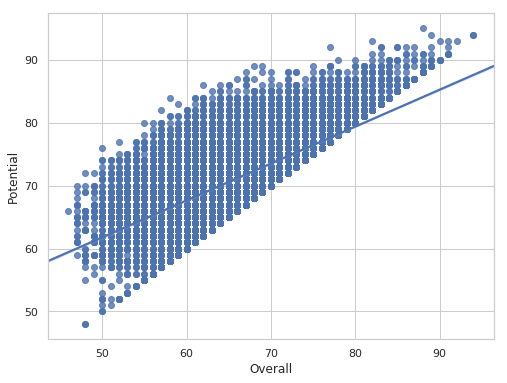

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.regplot(x="Overall", y="Potential", data=fifa19)
plt.show()

We can use a different color and marker as follows-

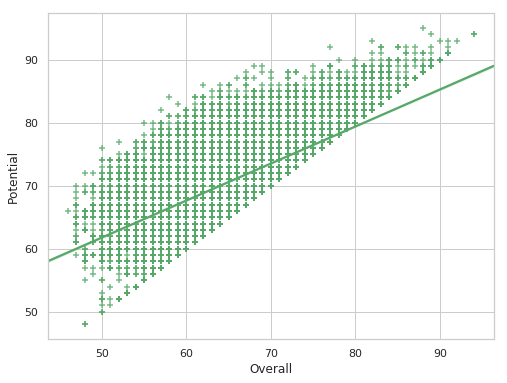

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.regplot(x="Overall", y="Potential", data=fifa19, color= "g", marker="+")
plt.show()

We can plot with a discrete variable and add some jitter as follows-

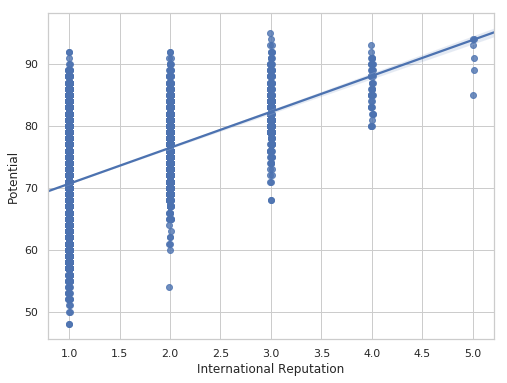

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
sns.regplot(x="International Reputation", y="Potential", data=fifa19, x_jitter=.01)
plt.show()

### **Seaborn `lmplot()` function**




- This function plots data and regression model fits across a FacetGrid.

- This function combines `regplot()` and `FacetGrid`. 

- It is intended as a convenient interface to fit regression models across conditional subsets of a dataset.

- We can plot a linear regression model between `Overall` and `Potential` variable with `lmplot()` function as follows-

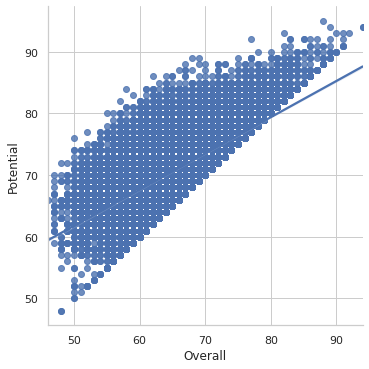

In [ ]:
g= sns.lmplot(x="Overall", y="Potential", data=fifa19)


We can condition on a third variable and plot the levels in different colors as follows-

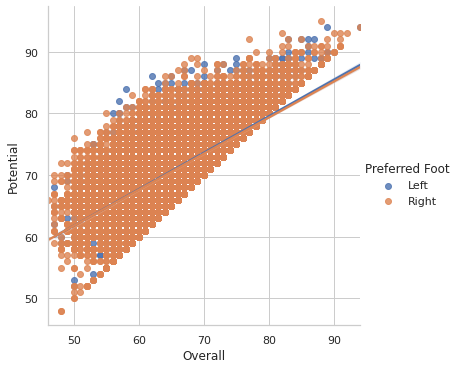

In [ ]:
g= sns.lmplot(x="Overall", y="Potential", hue="Preferred Foot", data=fifa19)

We can use a different color palette as follows-

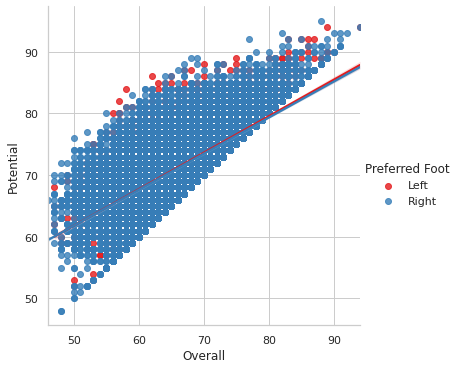

In [ ]:
g= sns.lmplot(x="Overall", y="Potential", hue="Preferred Foot", data=fifa19, palette="Set1")

We can plot the levels of the third variable across different columns as follows-

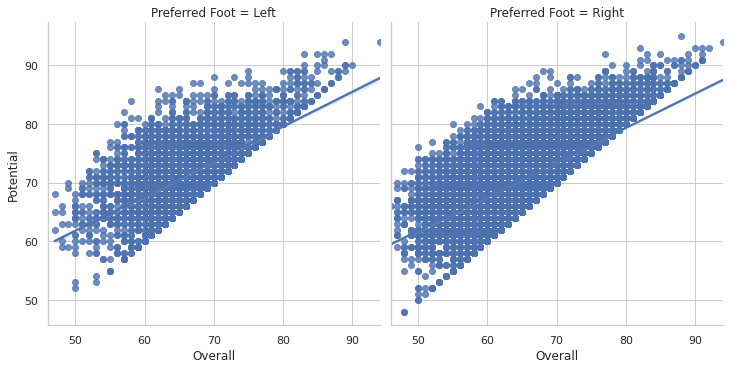

In [ ]:
g= sns.lmplot(x="Overall", y="Potential", col="Preferred Foot", data=fifa19)

### Multi-plot grids

### **Seaborn `FacetGrid()` function**



- The FacetGrid class is useful when you want to visualize the distribution of a variable or the relationship between multiple variables separately within subsets of your dataset. 

- A FacetGrid can be drawn with up to three dimensions - `row`, `col` and `hue`. The first two have obvious correspondence with the resulting array of axes - the `hue` variable is a third dimension along a depth axis, where different levels are plotted with different colors.

- The class is used by initializing a FacetGrid object with a dataframe and the names of the variables that will form the `row`, `column` or `hue` dimensions of the grid. 

- These variables should be categorical or discrete, and then the data at each level of the variable will be used for a facet along that axis.


We can initialize a 1x2 grid of facets using the fifa19 dataset.

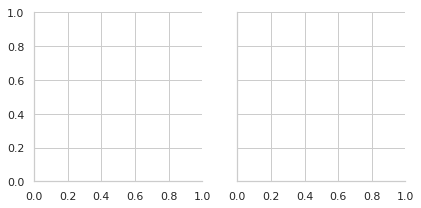

In [ ]:
g = sns.FacetGrid(fifa19, col="Preferred Foot")

We can draw a univariate plot of `Potential` variable on each facet as follows-

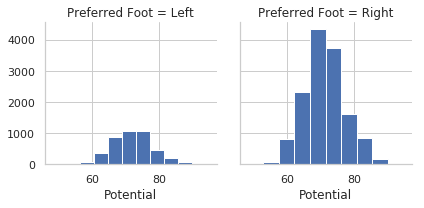

In [ ]:
g = sns.FacetGrid(fifa19, col="Preferred Foot")
g = g.map(plt.hist, "Potential")

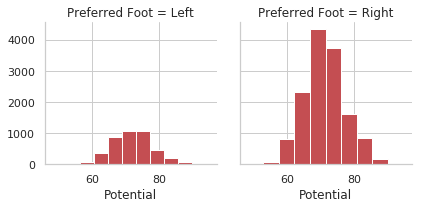

In [ ]:
g = sns.FacetGrid(fifa19, col="Preferred Foot")
g = g.map(plt.hist, "Potential", bins=10, color="r")

We can plot a bivariate function on each facet as follows-

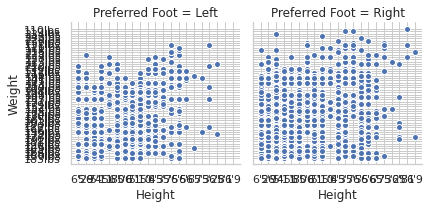

In [ ]:
g = sns.FacetGrid(fifa19, col="Preferred Foot")
g = (g.map(plt.scatter, "Height", "Weight", edgecolor="w").add_legend())

The size of the figure is set by providing the height of each facet, along with the aspect ratio:

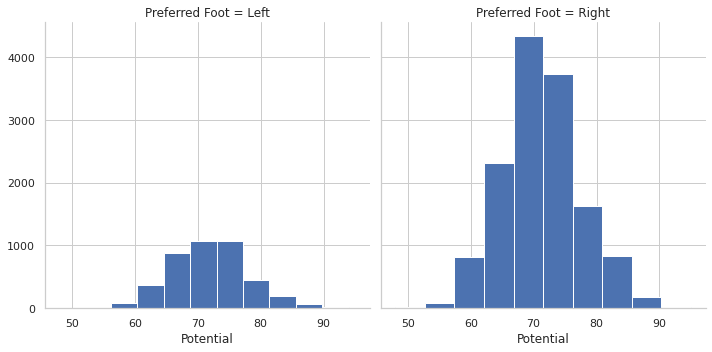

In [ ]:
g = sns.FacetGrid(fifa19, col="Preferred Foot", height=5, aspect=1)
g = g.map(plt.hist, "Potential")

### **Seaborn `Pairgrid()` function**




- This function plots subplot grid for plotting pairwise relationships in a dataset.

- This class maps each variable in a dataset onto a column and row in a grid of multiple axes. 

- Different axes-level plotting functions can be used to draw bivariate plots in the upper and lower triangles, and the the marginal distribution of each variable can be shown on the diagonal.

- It can also represent an additional level of conditionalization with the hue parameter, which plots different subets of data in different colors. 

- This uses color to resolve elements on a third dimension, but only draws subsets on top of each other and will not tailor the hue parameter for the specific visualization the way that axes-level functions that accept hue will.

In [ ]:
fifa19_new = fifa19[['Age', 'Potential', 'Strength', 'Stamina', 'Preferred Foot']]

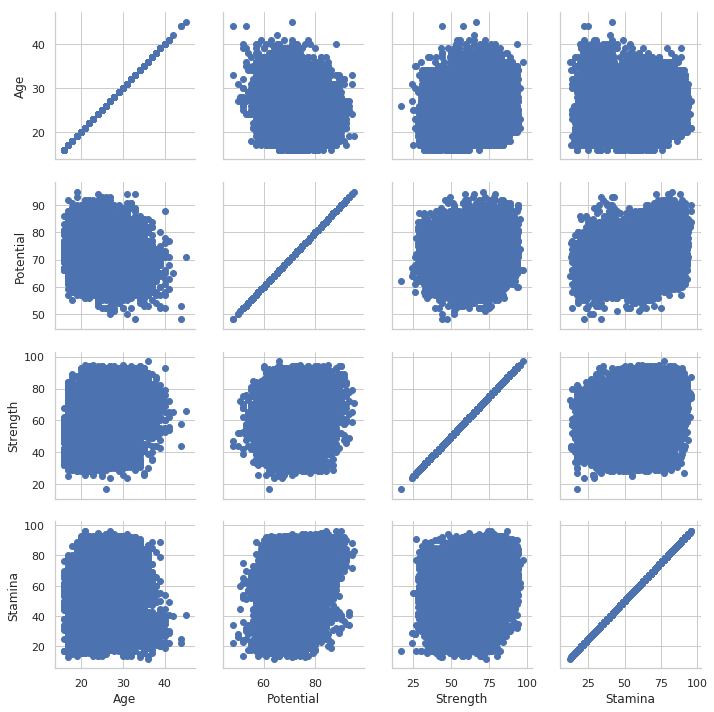

In [ ]:
g = sns.PairGrid(fifa19_new)
g = g.map(plt.scatter)

We can show a univariate distribution on the diagonal as follows-

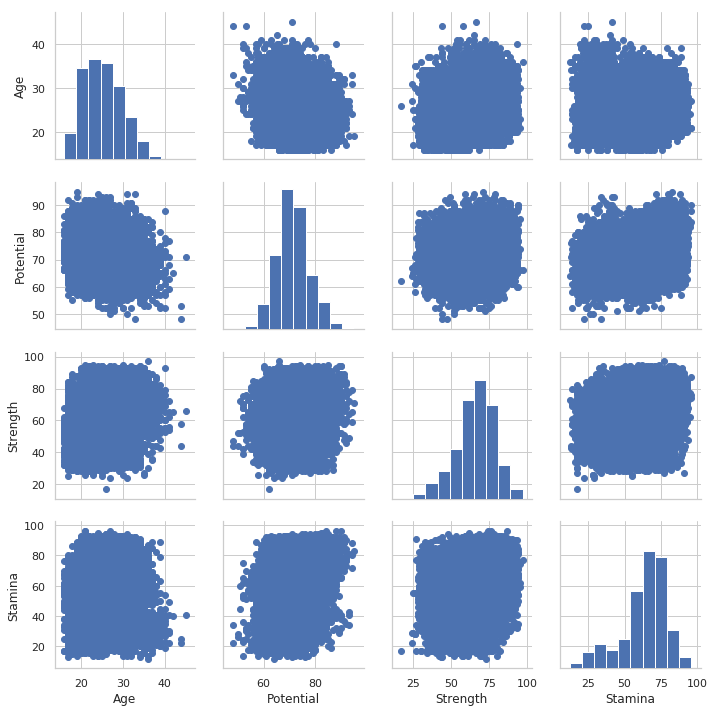

In [ ]:
g = sns.PairGrid(fifa19_new)
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)

We can color the points using the categorical variable `Preferred Foot` as follows -

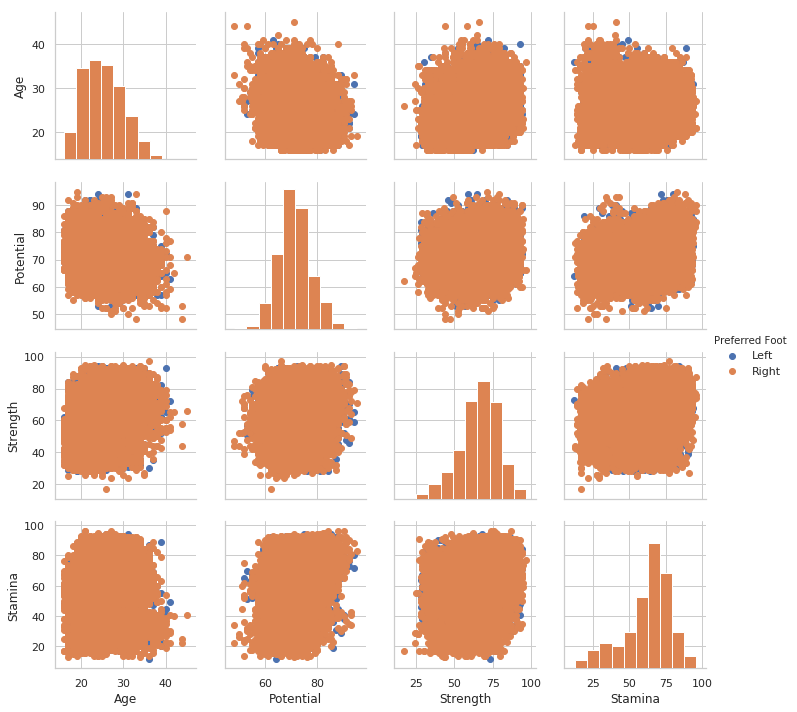

In [ ]:
g = sns.PairGrid(fifa19_new, hue="Preferred Foot")
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)
g = g.add_legend()


We can use a different style to show multiple histograms as follows-

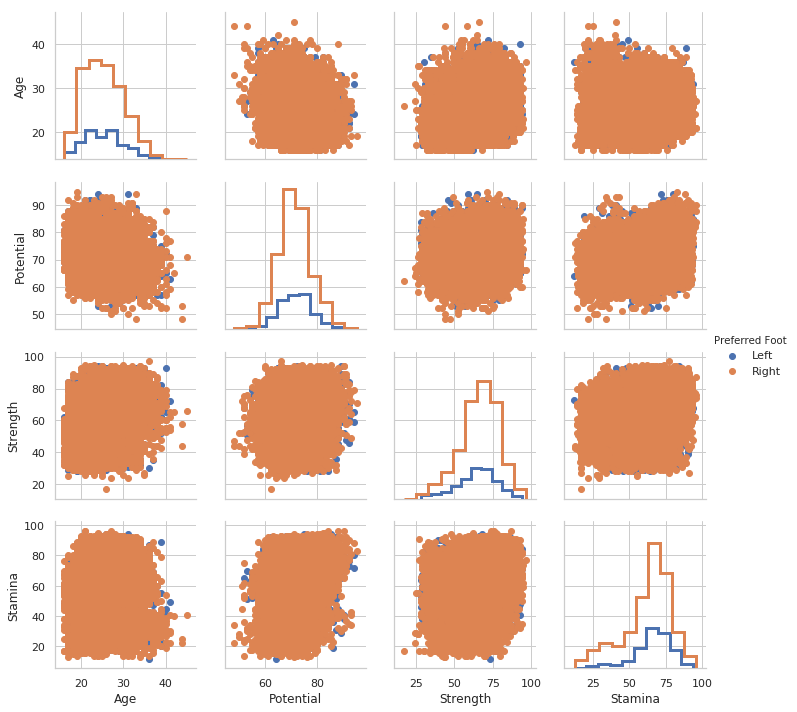

In [ ]:
g = sns.PairGrid(fifa19_new, hue="Preferred Foot")
g = g.map_diag(plt.hist, histtype="step", linewidth=3)
g = g.map_offdiag(plt.scatter)
g = g.add_legend()

We can plot a subset of variables as follows-

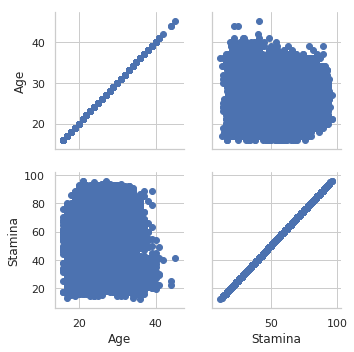

In [ ]:
g = sns.PairGrid(fifa19_new, vars=['Age', 'Stamina'])
g = g.map(plt.scatter)

We can use different functions on the upper and lower triangles as follows-

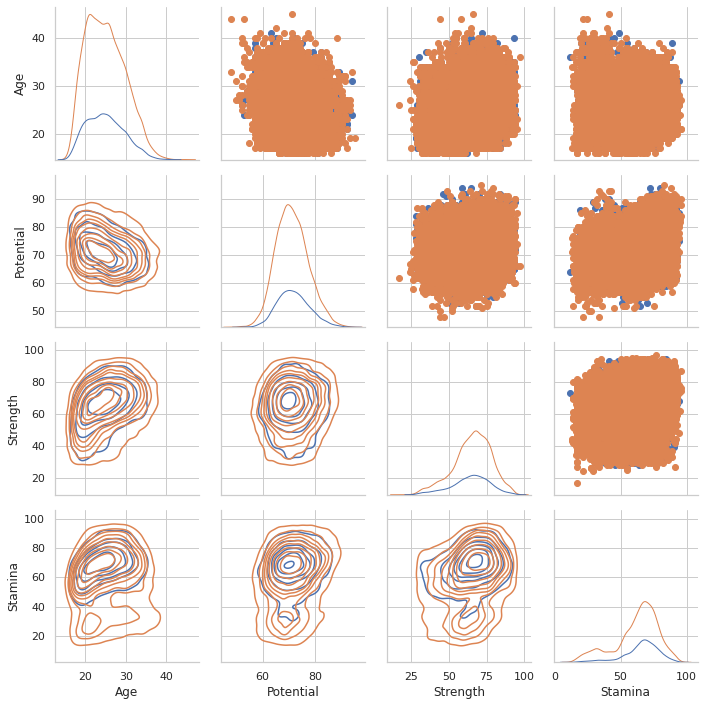

In [ ]:
g = sns.PairGrid(fifa19_new, hue="Preferred Foot")
g = g.map_upper(plt.scatter)
g = g.map_lower(sns.kdeplot)
g = g.map_diag(sns.kdeplot, lw=1)# lw = linewidth

-> to learn more about the kde plots you can refer this [link](https://seaborn.pydata.org/tutorial/distributions.html#tutorial-kde)

### Seaborn `Jointgrid()` function


- This function provides a grid for drawing a bivariate plot with marginal univariate plots.

- It set up the grid of subplots.

We can initialize the figure and add plots using default parameters as follows-

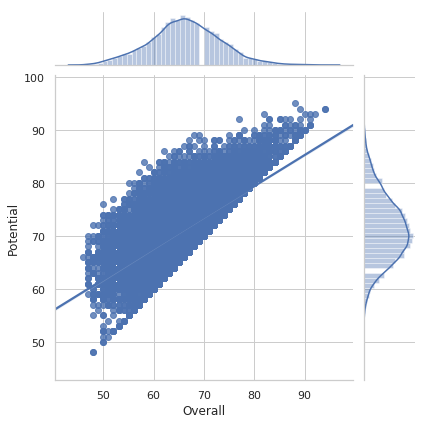

In [ ]:
g = sns.JointGrid(x="Overall", y="Potential", data=fifa19)
g = g.plot(sns.regplot, sns.distplot)

We can draw the join and marginal plots separately, which allows finer-level control other parameters as follows -

In [ ]:
import matplotlib.pyplot as plt

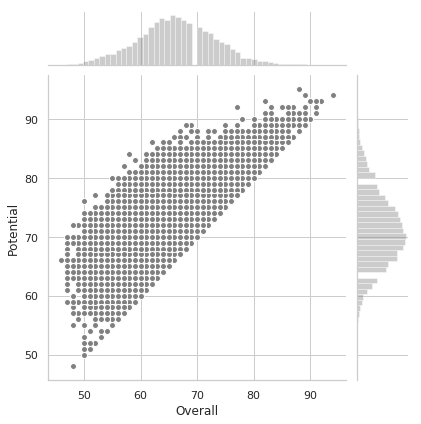

In [ ]:
g = sns.JointGrid(x="Overall", y="Potential", data=fifa19)
g = g.plot_joint(plt.scatter, color=".5", edgecolor="white")
g = g.plot_marginals(sns.distplot, kde=False, color=".5")

We can remove the space between the joint and marginal axes as follows -

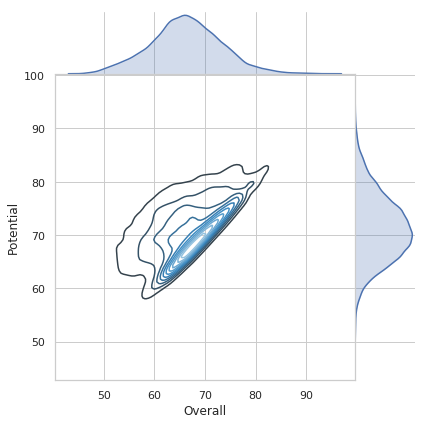

In [ ]:
g = sns.JointGrid(x="Overall", y="Potential", data=fifa19, space=0)
g = g.plot_joint(sns.kdeplot, cmap="Blues_d")
g = g.plot_marginals(sns.kdeplot, shade=True)

We can draw a smaller plot with relatively larger marginal axes as follows -

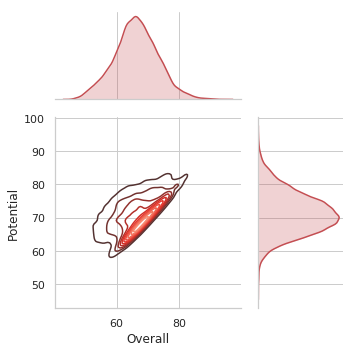

In [ ]:
g = sns.JointGrid(x="Overall", y="Potential", data=fifa19, height=5, ratio=2)
g = g.plot_joint(sns.kdeplot, cmap="Reds_d")
g = g.plot_marginals(sns.kdeplot, color="r", shade=True)

### Controlling the size and shape of the plot


- The default plots made by `regplot()` and `lmplot()` look the same but on axes that have a different size and shape. 

- This is because `regplot()` is an “axes-level” function draws onto a specific axes. 

- This means that you can make multi-panel figures yourself and control exactly where the regression plot goes. 

- If no axes object is explicitly provided, it simply uses the “currently active” axes, which is why the default plot has the same size and shape as most other matplotlib functions. 

- To control the size, we need to create a figure object ourself as follows-

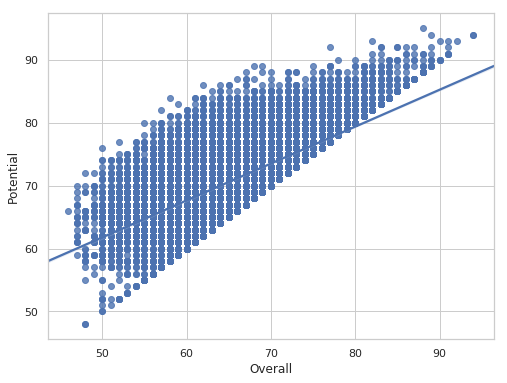

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.regplot(x="Overall", y="Potential", data=fifa19);

In contrast, the size and shape of the `lmplot()` figure is controlled through the FacetGrid interface using the size and aspect parameters, which apply to each facet in the plot, not to the overall figure itself.

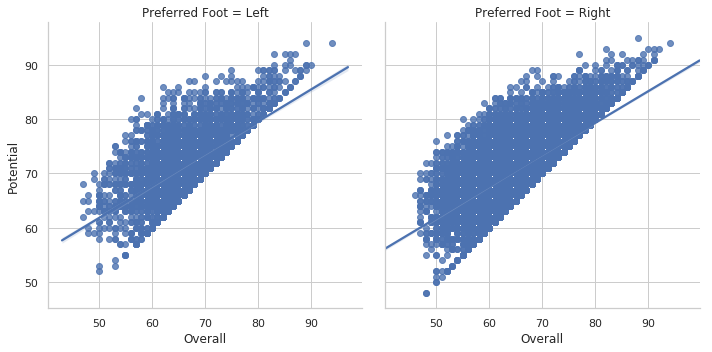

In [ ]:
sns.lmplot(x="Overall", y="Potential", col="Preferred Foot", data=fifa19, col_wrap=2, height=5, aspect=1)

### Seaborn figure styles


- There are five preset seaborn themes: `darkgrid`, `whitegrid`, `dark`, `white` and `ticks`. 

- They are each suited to different applications and personal preferences. 

- The default theme is darkgrid. 

- The grid helps the plot serve as a lookup table for quantitative information, and the white-on grey helps to keep the grid from competing with lines that represent data. 

- The whitegrid theme is similar, but it is better suited to plots with heavy data elements:



I will define a simple function to plot some offset sine waves, which will help us see the different stylistic parameters as follows -

In [ ]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

This is what the plot looks like with matplotlib default parameters.

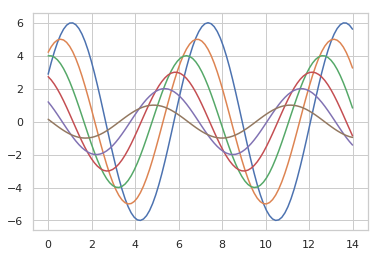

In [ ]:
sinplot()

To switch to seaborn defaults, we need to call the `set()` function as follows -

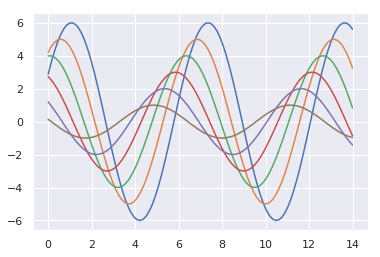

In [ ]:
sns.set()
sinplot()

- We can set different styles as follows -

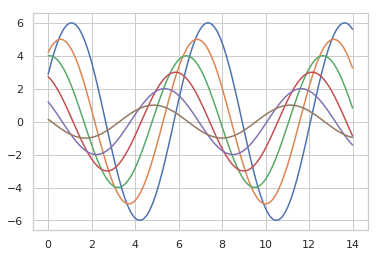

In [ ]:
sns.set_style("whitegrid")
sinplot()

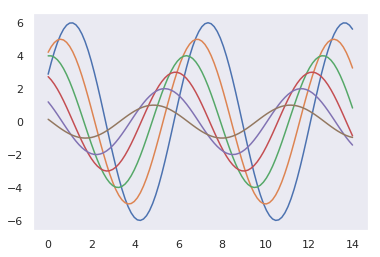

In [ ]:
sns.set_style("dark")
sinplot()

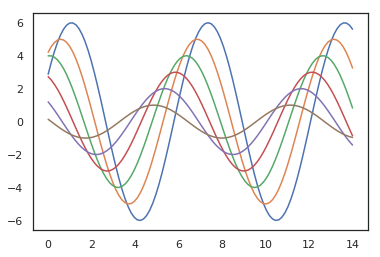

In [ ]:
sns.set_style("white")
sinplot()

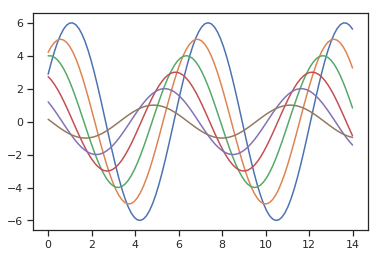

In [ ]:
sns.set_style("ticks")
sinplot()

With that, we come to the end of this tutorial.

I hope you find it useful.



**References:**


Seaborn Official Tutorial

http://seaborn.pydata.org/tutorial.html

https://seaborn.pydata.org/tutorial/axis_grids.html

https://seaborn.pydata.org/generated/seaborn.kdeplot.html


Seaborn documentation and API reference

http://seaborn.pydata.org/

http://seaborn.pydata.org/api.html



Useful Seaborn tutorials

https://www.datacamp.com/community/tutorials/seaborn-python-tutorial

https://elitedatascience.com/python-seaborn-tutorial

https://www.tutorialspoint.com/seaborn/index.htm#

https://campus.datacamp.com/courses/intermediate-data-visualization-with-seaborn/additional-plot-types?ex=1


## <font color='brown'>**`Assignments for practice`**</font> - 

Bring 10 insights from Dataset - https://www.kaggle.com/c/kaggle-survey-2019/data?select=multiple_choice_responses.csv

Which are most important according to you.